# Pymaceuticals Inc.
---

### Analysis

1. Drug Regimens Capomulin and Ramican have the top number of timepoints and both proved effective at reducing tumor size.  Future analysis and trials could be conducted at determining why these are more effective at reducing tumors than the other drug regimens.

2. Per the correlation between mouse weight and the average tumor volume is 0.84.  My calculation came out at 0.66.  The correlation still indicates a strong positive correlation that as the weight of the mice increases so does the tumor size.  

3. There is a good balance of female and male mice used for the study.

4. The age of the mice used in the study does not seem related to the final tumor volume in the study.

 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_mouse_data = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")

# Display the data table for preview
combined_mouse_data.head()


Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [2]:
# Checking the number of mice.  Use value counts to get the frequency of column Mouse ID.
mice=combined_mouse_data["Mouse ID"].value_counts()
print(len(mice))

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_dup = combined_mouse_data.loc[combined_mouse_data.duplicated(subset= ['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
mouse_dup

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID using comparison double equal sign where all the rows for Mouse ID is equal to g989. 
duplicate_mouse = combined_mouse_data.loc[combined_mouse_data["Mouse ID"] == "g989" , :]
duplicate_mouse

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   
918     g989     Propriva  Female          21          26         25   
919     g989     Propriva  Female          21          26         30   
920     g989     Propriva  Female          21          26         35   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392                 0  
912           51.745156                 0  
913           49.880528                 0  
914           51.325852                 1  
915           53.442020                 0  
916           55.326122                 1  
917           54.657650                 1  
918           56.045564                 1  
919           59.082294                 1  
920           62.570880                 2

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.  My screenshot doesn not look like checkpoint so not sure what I'm doing wrong.
no_dups_mice = combined_mouse_data[combined_mouse_data['Mouse ID'].isin(mouse_dup)==False]
no_dups_mice.head()

Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1

In [6]:
# Checking the number of mice in the clean DataFrame by checking the length of my clean df for Mouse ID.
len(no_dups_mice["Mouse ID"].unique())


248

## Summary Statistics

In [7]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line.  Assemble the resulting series into a single summary DataFrame.

summary_stats = combined_mouse_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
summary_stats


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

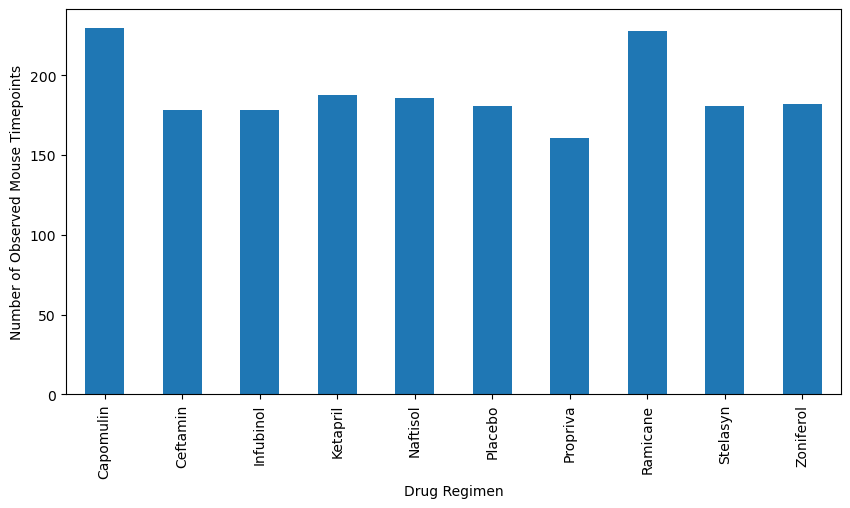

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_data = combined_mouse_data.groupby(["Drug Regimen"]).count()["Mouse ID"] 
    
drug_regimen_data.plot(kind="bar", figsize=(10,5))

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")

plt.show()

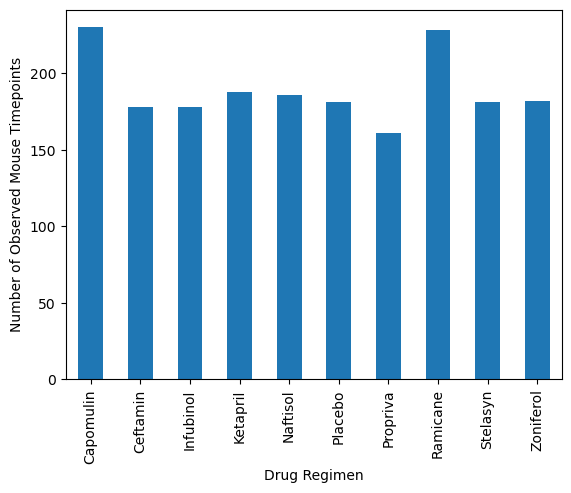

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_count = combined_mouse_data.groupby('Drug Regimen')['Mouse ID'].count()

drug_regimen_count.plot(kind='bar')

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Observed Mouse Timepoints")

plt.show()

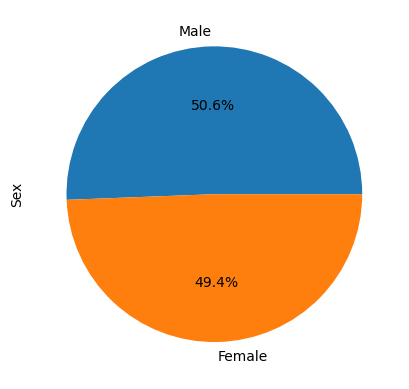

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
counts = combined_mouse_data.Sex.value_counts()
counts.plot(kind="pie",autopct='%1.1f%%')
plt.show()

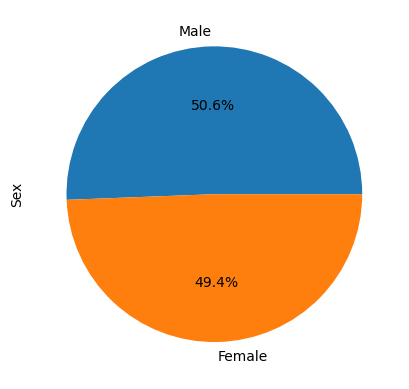

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts = combined_mouse_data.Sex.value_counts()
plt.pie(counts.values,labels=counts.index.values,autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = combined_mouse_data.groupby(['Mouse ID'])['Timepoint'].max()
last_timepoint_df = pd.DataFrame(last_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_vol = pd.merge(combined_mouse_data, last_timepoint_df, on = ('Mouse ID', 'Timepoint'), how='right')
last_timepoint_vol

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0       a203    Infubinol  Female          20          23         45   
1       a251    Infubinol  Female          21          25         45   
2       a262      Placebo  Female          17          29         45   
3       a275     Ceftamin  Female          20          28         45   
4       a366     Stelasyn  Female          16          29         30   
..       ...          ...     ...         ...         ...        ...   
244     z435     Propriva  Female          12          26         10   
245     z578     Ramicane    Male          11          16         45   
246     z581    Infubinol  Female          24          25         45   
247     z795     Naftisol  Female          13          29         45   
248     z969     Naftisol    Male           9          30         45   

     Tumor Volume (mm3)  Metastatic Sites  
0             67.973419                 2  
1             65.525743                 1  
2             70.717621                 4  
3             62.999356                 3  
4             63.440686                 1  
..                  ...               ...  
244           48.710661                 0  
245           30.638696                 0  
246           62.754451                 3  
247           65.741070                 3  
248           73.867845                 4  

[249 rows x 8 columns]

In [13]:
# Put treatments into a list for loop (and later for plot labels)
drug_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drug_treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume = last_timepoint_vol.loc[last_timepoint_vol["Drug Regimen"] == drug, 'Tumor Volume (mm3)']

    #Append the rows which contain mice on each drug
    tumor_volume.append(final_tumor_volume)

     # Determine outliers using upper and lower bounds
    quartiles = final_tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
    # print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
    # print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
    # print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # print(f"Values below {lower_bound} could be outliers.")
    # print(f"Values above {upper_bound} could be outliers.")
    
    outliers = final_tumor_volume.loc[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


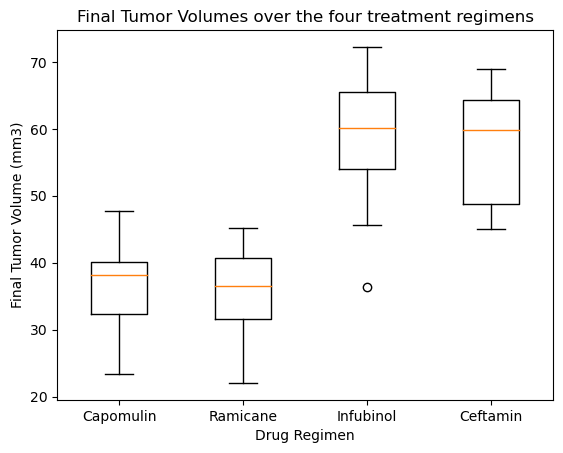

In [14]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volumes over the four treatment regimens")
ax1.boxplot(tumor_volume, labels=drug_treatments)
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel('Final Tumor Volume (mm3)')
plt.show()


## Line and Scatter Plots

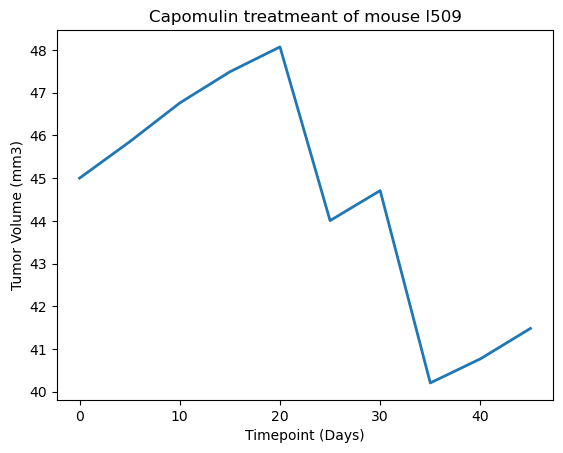

In [15]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_plot = no_dups_mice.loc[no_dups_mice['Mouse ID'] == 'l509',:]

x_axis = line_plot['Timepoint'] 
tumor_volume = line_plot['Tumor Volume (mm3)'] 

plt.plot(x_axis, tumor_volume, linewidth=2, markersize=12) 

plt.title('Capomulin treatmeant of mouse l509')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()

C:\Users\cabom\AppData\Local\Temp\ipykernel_5872\4107524808.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  capomulin_avg =  no_dups_mice.groupby(["Mouse ID"]).mean()


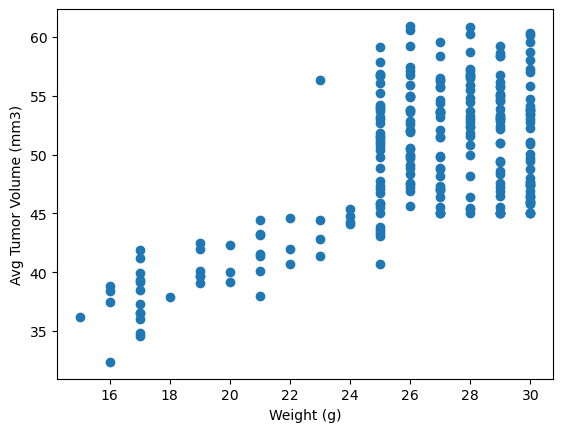

In [16]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_avg =  no_dups_mice.groupby(["Mouse ID"]).mean()

plt.scatter(capomulin_avg["Weight (g)"],capomulin_avg["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.66


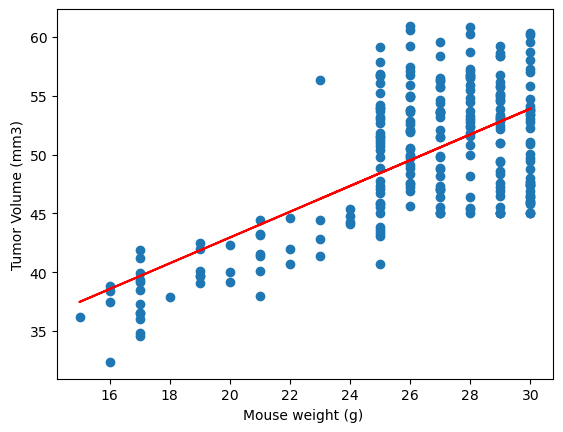

In [17]:
# Calculate the correlation and regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(capomulin_avg['Weight (g)'],capomulin_avg['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

x_values = capomulin_avg['Weight (g)']
y_values = capomulin_avg['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Mouse weight (g) ")
plt.ylabel("Tumor Volume (mm3)")
plt.show()